# Lab Week 3 - Logistic Regression

## EXERCISE: Predicting Survival on the Titanic

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

# TASK 1: read the data from titanic.csv into a DataFrame
import pandas as pd
titanic = pd.read_csv('C:/Users/seanr/Desktop/GeneralAssembly/DAT8SYD/data/titanic.csv', index_col='PassengerId')


In [13]:
# TASK 2: define Pclass/Parch as the features and Survived as the response
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

In [16]:
# TASK 3: split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
# TASK 4: fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
print(logreg.fit(X_train, y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [22]:
# TASK 5: make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.668161434978


In [27]:
# TASK 6: add Age as a feature and calculate testing accuracy
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
feature_cols = ['Pclass', 'Parch', 'Age']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class))


0.686098654709


In [25]:
# TASK 7 : Confusion Matrix
from sklearn import metrics
prds = logreg.predict(X)
print (metrics.confusion_matrix(y_test, y_pred_class))


[[112  16]
 [ 54  41]]


(array([ 0.   ,  0.125,  1.   ]), array([ 0.        ,  0.43157895,  1.        ]), array([2, 1, 0], dtype=int64))


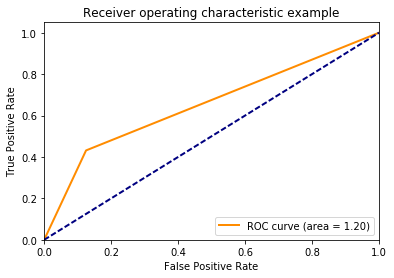

In [87]:
# TASK 8: Generate the ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

roc_curve_example = roc_curve(y_test, y_pred_class, pos_label=None, sample_weight=None,drop_intermediate=True)
print(roc_curve_example)



tpr = [0.,0.43157895,1.]
fpr = [0.,0.125,1.]
roc_auc = 1.2

plt.figure()
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



In [34]:
# TASK 9: What variables should we include in the model to improve it?

In [ ]:
# Task 10: Try a different classification algorithm like Naive Bayes or Nearest Neighbours